In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("C:/Users/vmurt/Downloads/data/Financial-Analytics-data1.csv")
data.head()

,Name,Mar Cap - Crore,Sales Qtr - Crore,Market_Cap_Category,Sales_Qrt_Category
0,Reliance Inds.,583436.72,99810.00,Large Cap,High Sales
1,TCS,563709.84,30904.00,Large Cap,High Sales
2,HDFC Bank,482953.59,20581.27,Large Cap,High Sales
3,ITC,320985.27,9772.02,Large Cap,High Sales
4,H D F C,289497.37,16840.51,Large Cap,High Sales


In [4]:
data.tail()

,Name,Mar Cap - Crore,Sales Qtr - Crore,Market_Cap_Category,Sales_Qrt_Category
454,Prime Focus,3031.50,609.61,Very Small Cap,Low Sales
455,Lak. Vilas Bank,3029.57,790.17,Very Small Cap,Low Sales
456,NOCIL,3026.26,249.27,Very Small Cap,Very Low Sales
457,Orient Cement,3024.32,511.53,Very Small Cap,Very Low Sales
458,Natl.Fertilizer,3017.07,2840.75,Very Small Cap,High Sales


In [5]:
data.shape

(459, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 459 non-null    object 
 1   Mar Cap - Crore      459 non-null    float64
 2   Sales Qtr - Crore    459 non-null    float64
 3   Market_Cap_Category  459 non-null    object 
 4   Sales_Qrt_Category   459 non-null    object 
dtypes: float64(2), object(3)
memory usage: 18.1+ KB


In [9]:
data.describe()

,Mar Cap - Crore,Sales Qtr - Crore
count,459.000000,459.000000
mean,28870.974139,3807.789412
std,60557.081792,9989.449987
min,3017.070000,0.000000
25%,4942.815000,534.910000
50%,10442.090000,1137.170000
75%,24707.320000,2730.195000
max,583436.720000,110666.930000


In [11]:
import plotly.express as px
import seaborn as sns
from collections import Counter


In [24]:
# Checking for missing values
missing_values = data.isnull().sum()

# Check data types
data_types = data.dtypes

# Display summary statistics for numerical fields
summary_statistics = data.describe()

# Print the results
print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)
print("\nSummary Statistics:\n", summary_statistics)

Missing Values:
 Name                   0
Mar Cap - Crore        0
Sales Qtr - Crore      0
Market_Cap_Category    0
Sales_Qrt_Category     0
dtype: int64

Data Types:
 Name                    object
Mar Cap - Crore        float64
Sales Qtr - Crore      float64
Market_Cap_Category     object
Sales_Qrt_Category      object
dtype: object

Summary Statistics:
        Mar Cap - Crore  Sales Qtr - Crore
count       459.000000         459.000000
mean      28870.974139        3807.789412
std       60557.081792        9989.449987
min        3017.070000           0.000000
25%        4942.815000         534.910000
50%       10442.090000        1137.170000
75%       24707.320000        2730.195000
max      583436.720000      110666.930000


<Axes: >

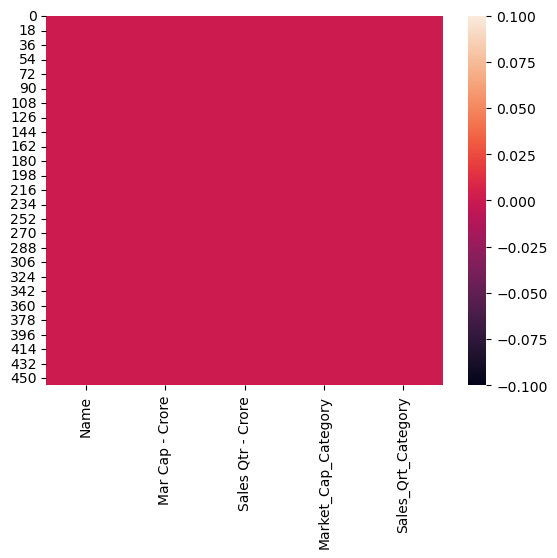

In [30]:
data.isna().sum()
sns.heatmap(data.isna())

<Axes: >

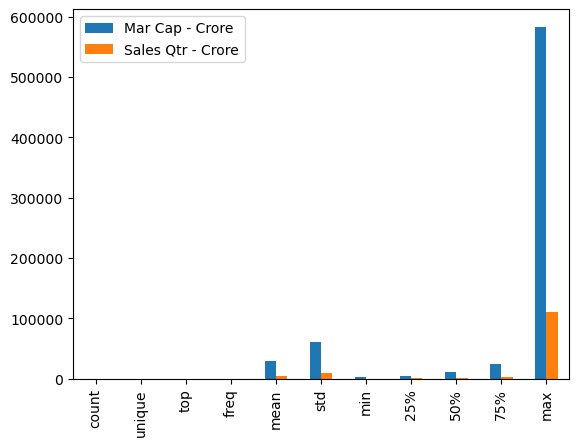

In [13]:
data.describe(include='all').plot(kind='bar')

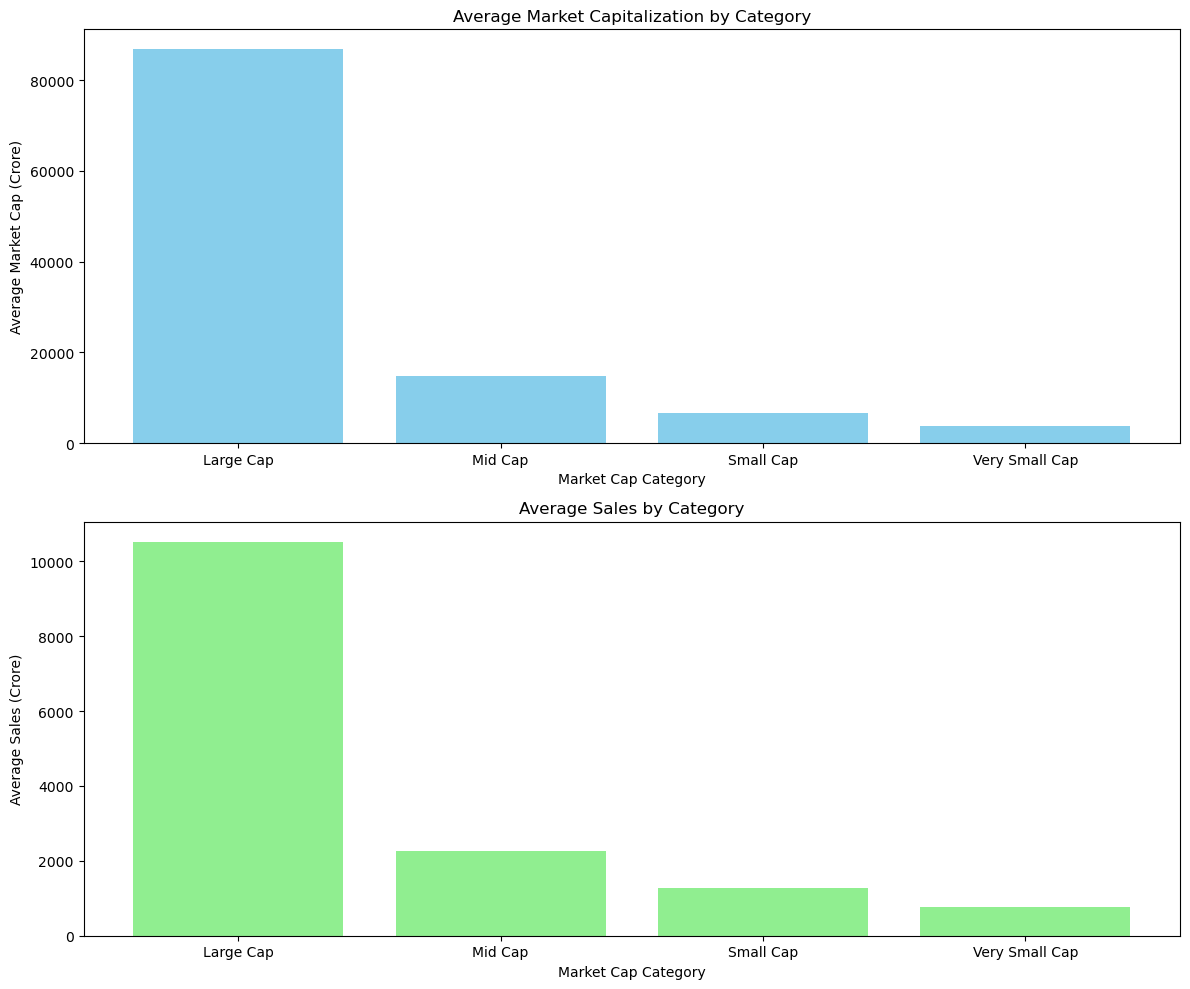

In [14]:
df_grouped = data.groupby('Market_Cap_Category').agg({
    'Mar Cap - Crore': 'mean',
    'Sales Qtr - Crore': 'mean'
}).reset_index()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot for Market Cap
ax[0].bar(df_grouped['Market_Cap_Category'], df_grouped['Mar Cap - Crore'], color='skyblue')
ax[0].set_title('Average Market Capitalization by Category')
ax[0].set_xlabel('Market Cap Category')
ax[0].set_ylabel('Average Market Cap (Crore)')

# Plot for Sales
ax[1].bar(df_grouped['Market_Cap_Category'], df_grouped['Sales Qtr - Crore'], color='lightgreen')
ax[1].set_title('Average Sales by Category')
ax[1].set_xlabel('Market Cap Category')
ax[1].set_ylabel('Average Sales (Crore)')

plt.tight_layout()
plt.show()

Text(120.72222222222221, 0.5, 'Market Cap Category')

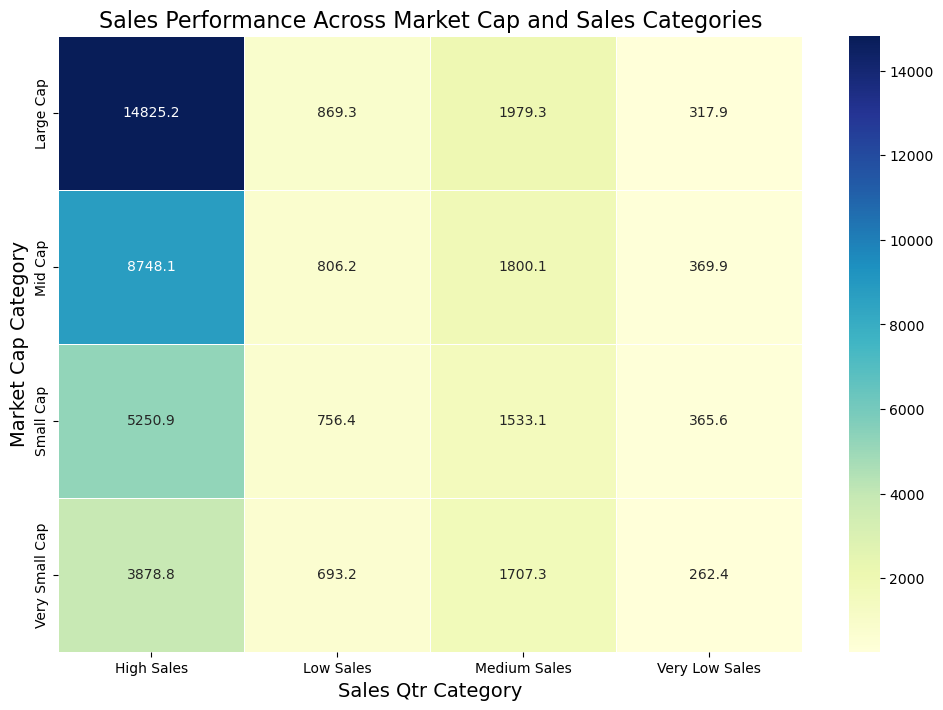

In [15]:
pivot_table = data.pivot_table(
    values='Sales Qtr - Crore',
    index='Market_Cap_Category',
    columns='Sales_Qrt_Category',
    aggfunc='mean'
)

# Plotting the heat map
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5)
heatmap.set_title('Sales Performance Across Market Cap and Sales Categories', size=16)
heatmap.set_xlabel('Sales Qtr Category', size=14)
heatmap.set_ylabel('Market Cap Category', size=14)

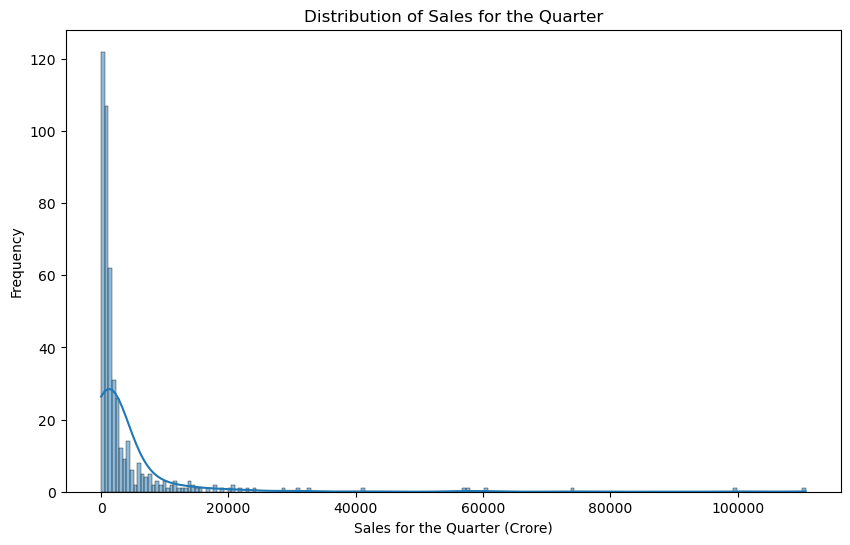

In [21]:
# Plot the distribution of Sales for the Quarter
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales Qtr - Crore'], kde=True)
plt.title('Distribution of Sales for the Quarter')
plt.xlabel('Sales for the Quarter (Crore)')
plt.ylabel('Frequency')
plt.show()

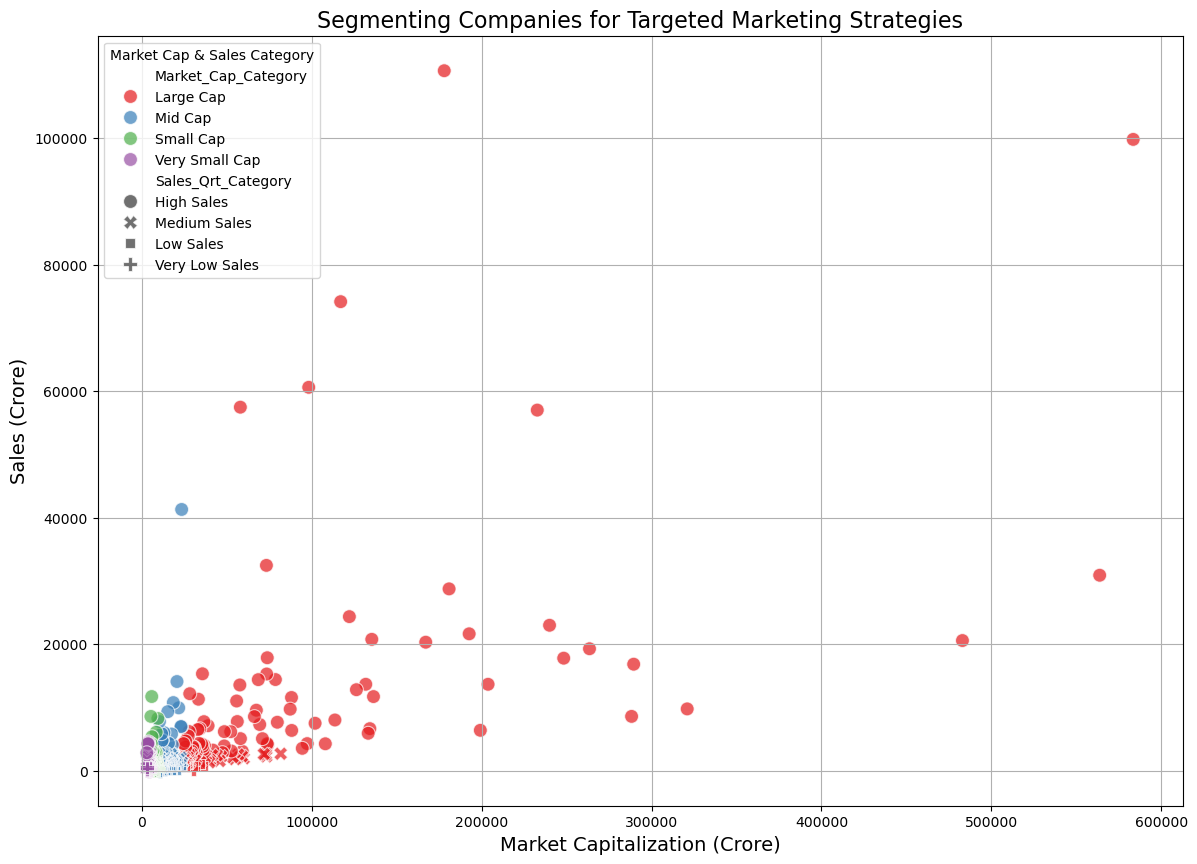

In [17]:
plt.figure(figsize=(14, 10))

# Create the scatter plot
scatter_plot = sns.scatterplot(
    data=data,
    x='Mar Cap - Crore',
    y='Sales Qtr - Crore',
    hue='Market_Cap_Category',
    style='Sales_Qrt_Category',
    palette='Set1',
    s=100,  # Size of the points
    alpha=0.7,  # Transparency of the points
)

# Customizing the plot
scatter_plot.set_title('Segmenting Companies for Targeted Marketing Strategies', size=16)
scatter_plot.set_xlabel('Market Capitalization (Crore)', size=14)
scatter_plot.set_ylabel('Sales (Crore)', size=14)
scatter_plot.legend(title='Market Cap & Sales Category')
plt.grid(True)
plt.show()

C:\Users\vmurt\AppData\Local\Temp\ipykernel_11776\2940681649.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\vmurt\AppData\Local\Temp\ipykernel_11776\2940681649.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


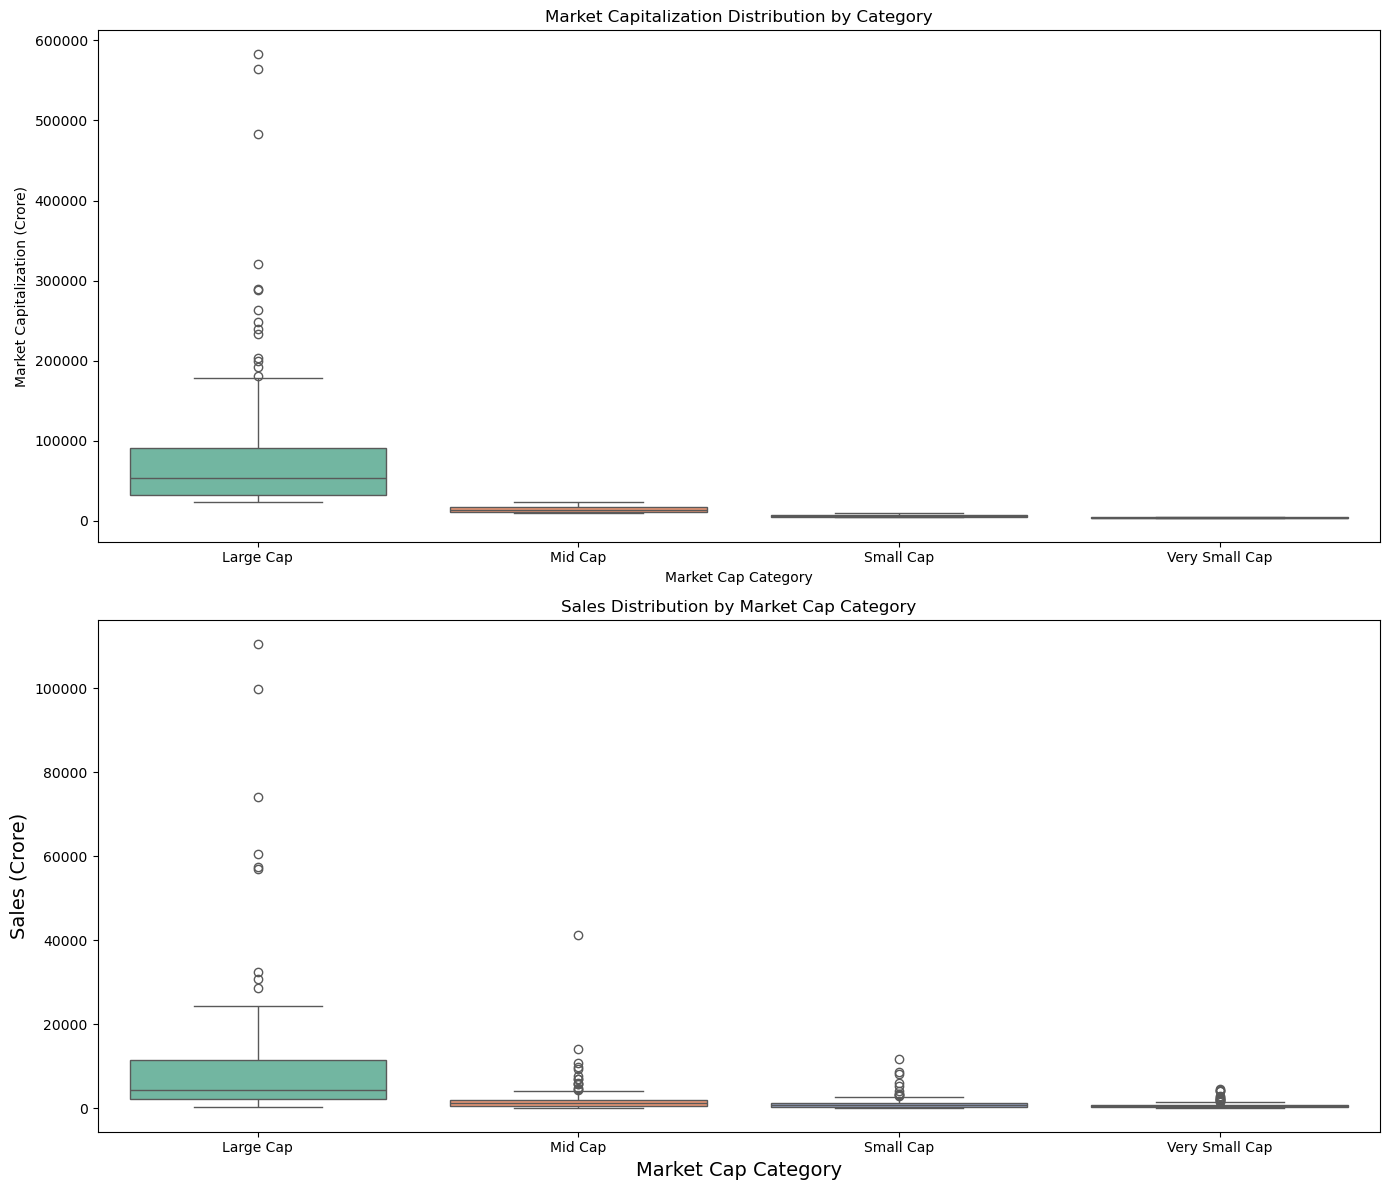

In [19]:
# Create a figure with two subplots for market cap and sales distributions
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Box plot for Market Cap
sns.boxplot(
    data=data,
    x='Market_Cap_Category',
    y='Mar Cap - Crore',
    ax=ax[0],
    palette='Set2'
)
ax[0].set_title('Market Capitalization Distribution by Category', size=12)
ax[0].set_xlabel('Market Cap Category', size=10)
ax[0].set_ylabel('Market Capitalization (Crore)', size=10)

# Box plot for Sales
sns.boxplot(
    data=data,
    x='Market_Cap_Category',
    y='Sales Qtr - Crore',
    ax=ax[1],
    palette='Set2'
)
ax[1].set_title('Sales Distribution by Market Cap Category', size=12)
ax[1].set_xlabel('Market Cap Category', size=14)
ax[1].set_ylabel('Sales (Crore)', size=14)

plt.tight_layout()
plt.show()


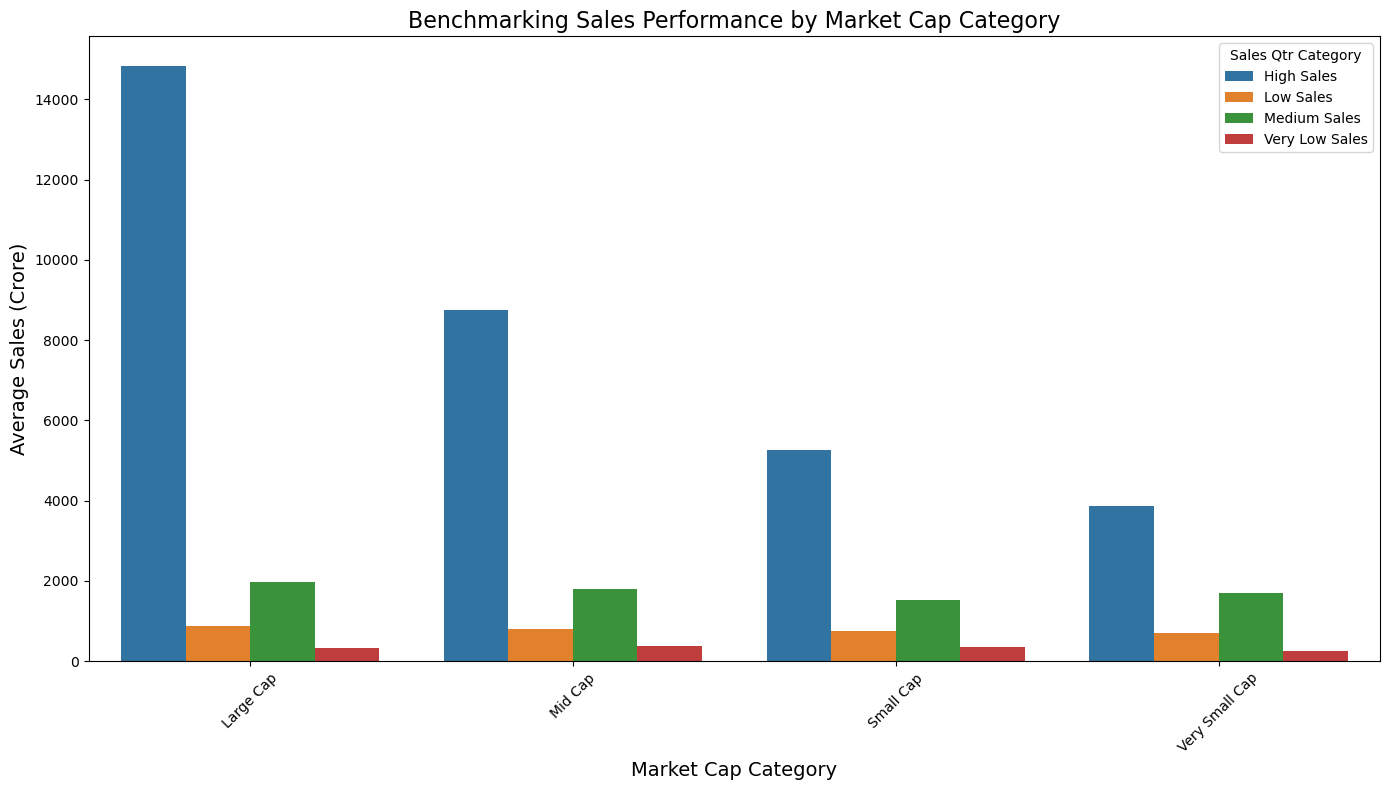

In [22]:
# Assuming 'data' is your dataframe
# Group by 'Market_Cap_Category' and 'Sales_Qrt_Category' to calculate the average sales
benchmark_data = data.groupby(['Market_Cap_Category', 'Sales_Qrt_Category']).agg({
    'Sales Qtr - Crore': 'mean'
}).reset_index()

# Plotting the bar chart
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(
    data=benchmark_data,
    x='Market_Cap_Category',
    y='Sales Qtr - Crore',
    hue='Sales_Qrt_Category',
    palette='tab10'
)

# Customizing the plot
bar_plot.set_title('Benchmarking Sales Performance by Market Cap Category', size=16)
bar_plot.set_xlabel('Market Cap Category', size=14)
bar_plot.set_ylabel('Average Sales (Crore)', size=14)
bar_plot.legend(title='Sales Qtr Category')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

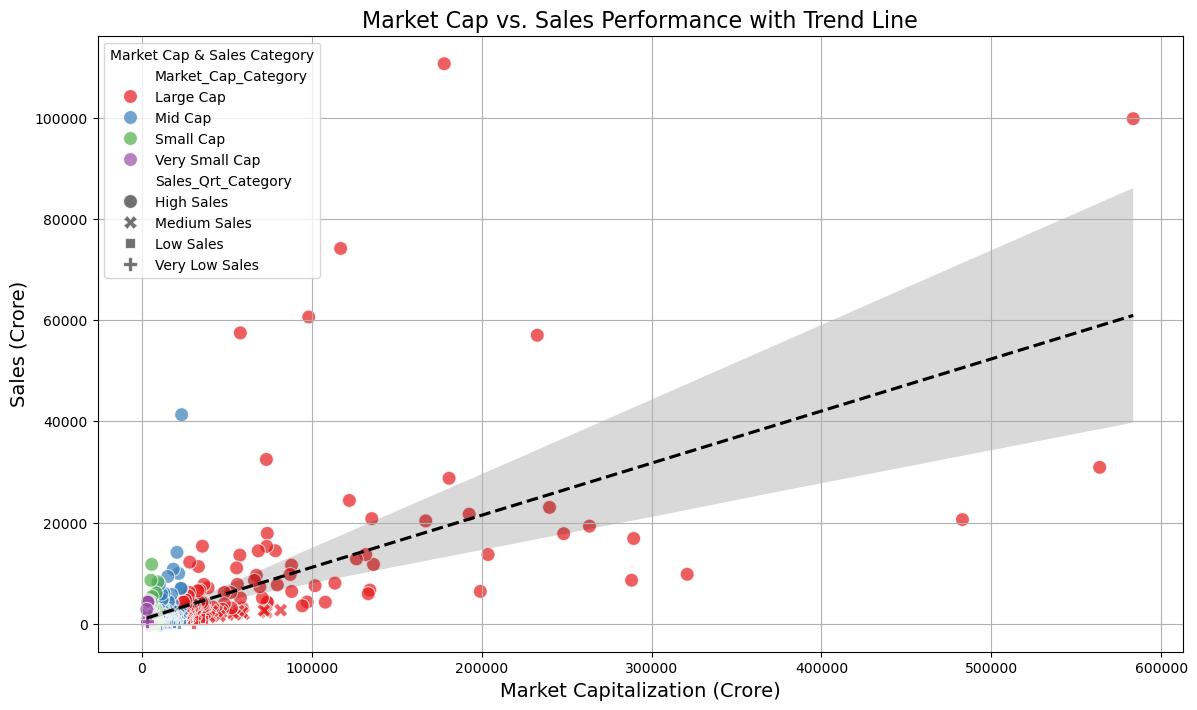

In [23]:
# Create the scatter plot with a trend line
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(
    data=data,
    x='Mar Cap - Crore',
    y='Sales Qtr - Crore',
    hue='Market_Cap_Category',
    style='Sales_Qrt_Category',
    palette='Set1',
    s=100,
    alpha=0.7
)

# Add a trend line
sns.regplot(
    data=data,
    x='Mar Cap - Crore',
    y='Sales Qtr - Crore',
    scatter=False,  # Do not plot scatter points again
    color='black',
    line_kws={'linestyle': '--'}
)

# Customizing the plot
scatter_plot.set_title('Market Cap vs. Sales Performance with Trend Line', size=16)
scatter_plot.set_xlabel('Market Capitalization (Crore)', size=14)
scatter_plot.set_ylabel('Sales (Crore)', size=14)
scatter_plot.legend(title='Market Cap & Sales Category')

plt.grid(True)
plt.show()